### Assignment 01: 
1. Load the Iris dataset into a pandas DataFrame
2. Find the mean and median of the 'sepal_length' column.
3. Calculate the 75th percentile of the 'petal_width' column for each species in the Iris dataset.
4. Create a new column in the Iris DataFrame called 'sepal_area', which is the product of 'sepal_length' and 'sepal_width'.
5. Remove all rows in the Iris DataFrame where 'petal_length' is greater than twice the standard deviation of 'petal_length' for that species.
6. Normalize all numerical columns in the Iris DataFrame (except the 'species' column) using Min-Max scaling.
7. Find the three most common combinations of 'sepal_length', 'sepal_width', and 'petal_length' in the Iris dataset.
8. Group the Iris DataFrame by 'species' and find the row with the highest 'sepal_width' for each group.
9. Replace all negative values in the 'petal_width' column of the Iris DataFrame with the mean of the non-negative values in that column.
10. Calculate the correlation matrix for the 'sepal_length', 'sepal_width', 'petal_length', and 'petal_width' columns in the Iris dataset and find the feature with the highest absolute correlation with 'petal_width'.



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore

# Load the Iris dataset into a pandas DataFrame
iris_df = sns.load_dataset('iris')

In [ ]:
# Find the mean and median of the 'sepal_length' column
sepal_length_mean = iris_df['sepal_length'].mean()
sepal_length_median = iris_df['sepal_length'].median()
print(sepal_length_mean,sepal_length_median)

In [ ]:
# Calculate the 75th percentile of the 'petal_width' column for each species
percentile_75th = iris_df.groupby('species')['petal_width'].quantile(0.75)
print(percentile_75th )

In [ ]:
# Create a new column in the Iris DataFrame called 'sepal_area'
iris_df['sepal_area'] = iris_df['sepal_length'] * iris_df['sepal_width']

In [ ]:
# Remove all rows in the Iris DataFrame where 'petal_length' is greater than twice the standard deviation
# of 'petal_length' for that species
iris_df = iris_df[np.abs(iris_df['petal_length'] - iris_df.groupby('species')['petal_length'].transform('mean')) <= (2 * iris_df.groupby('species')['petal_length'].transform('std'))]

In [ ]:
# Normalize all numerical columns in the Iris DataFrame using Min-Max scaling
scaler = MinMaxScaler()
iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] = scaler.fit_transform(iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

In [ ]:
# Find the three most common combinations of 'sepal_length', 'sepal_width', and 'petal_length' in the Iris dataset
top_combinations = iris_df.groupby(['sepal_length', 'sepal_width', 'petal_length']).size().nlargest(3)
print(top_combinations)

In [ ]:
# Group the Iris DataFrame by 'species' and find the row with the highest 'sepal_width' for each group
highest_sepal_width = iris_df.loc[iris_df.groupby('species')['sepal_width'].idxmax()]
print(highest_sepal_width)

In [ ]:
# Replace all negative values in the 'petal_width' column with the mean of the non-negative values
iris_df['petal_width'] = iris_df['petal_width'].apply(lambda x: x if x >= 0 else iris_df['petal_width'][iris_df['petal_width'] >= 0].mean())

In [ ]:
# Calculate the correlation matrix for the columns and find the feature with the highest absolute correlation with 'petal_width'
correlation_matrix = iris_df.corr()
highest_correlation_feature = correlation_matrix['petal_width'].abs().sort_values(ascending=False).index[1]
print(highest_correlation_feature)

### Assignment 02:
1. Load the Titanic dataset (available in seaborn) into a pandas DataFrame 
2. Find the average age of passengers for each class (1st, 2nd, and 3rd).
3. Create a new DataFrame that contains the count of male and female passengers in each age group (e.g., 0-10, 11-20, etc.).
4. Find the name and ticket number of the passenger(s) who paid the highest fare and survived the disaster.
5. Calculate the survival rate for passengers who were traveling alone (without any siblings, spouses, parents, or children) versus those who were traveling with family members.
6. For each passenger, calculate the age difference with the oldest sibling (if any) and the age difference with the youngest sibling (if any).
7. Find the most common deck letter (A, B, C, etc.) for each passenger class.
8. Group the Titanic DataFrame by 'Embarked' (port of embarkation) and find the percentage of passengers who survived in each group.
9. Calculate the correlation matrix for the 'Age', 'Fare', and 'Survived' columns in the Titanic dataset and find the feature with the highest absolute correlation with 'Survived'.
10. Create a new DataFrame that contains the 'Pclass', 'Sex', 'Age', and 'Fare' columns from the Titanic dataset and pivot it to have 'Pclass' as the index, 'Sex' as the columns, and 'Fare' as the values, with 'Age' as the weights.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset into a pandas DataFrame
titanic_df = sns.load_dataset('titanic')

# Find the average age of passengers for each class (1st, 2nd, and 3rd)
average_age_by_class = titanic_df.groupby('class')['age'].mean()
print("Average Age by Class:")
print(average_age_by_class)

# Create a new DataFrame that contains the count of male and female passengers in each age group
age_groups = pd.cut(titanic_df['age'], bins=np.arange(0, 100, 10))
passenger_count_by_age_group = titanic_df.groupby([age_groups, 'sex']).size().unstack()
print("\nCount of Passengers by Age Group and Sex:")
print(passenger_count_by_age_group)

# Find the name and ticket number of the passenger(s) who paid the highest fare and survived the disaster
highest_fare_survivor = titanic_df.loc[(titanic_df['fare'] == titanic_df[titanic_df['survived'] == 1]['fare'].max()) & (titanic_df['survived'] == 1), ['sex', 'pclass']]
print("\nPassenger(s) with the Highest Fare and Survived:")
print(highest_fare_survivor)

# Calculate the survival rate for passengers who were traveling alone versus those who were traveling with family members
titanic_df['travel_alone'] = (titanic_df['sibsp'] == 0) & (titanic_df['parch'] == 0)
survival_rate_by_travel_companions = titanic_df.groupby('travel_alone')['survived'].mean()
print("\nSurvival Rate by Travel Companions:")
print(survival_rate_by_travel_companions)

# For each passenger, calculate the age difference with the oldest sibling and the youngest sibling
titanic_df['sibling_age_difference'] = titanic_df['age'] - titanic_df.groupby('sibsp')['age'].transform('max')
titanic_df['oldest_sibling_age_difference'] = titanic_df.groupby('sibsp')['sibling_age_difference'].transform('max')
titanic_df['youngest_sibling_age_difference'] = titanic_df.groupby('sibsp')['sibling_age_difference'].transform('min')

# Find the most common deck letter for each passenger class
# Convert 'deck' column to string type temporarily
titanic_df['deck'] = titanic_df['deck'].astype(str)

# Fill missing values with 'Unknown'
titanic_df['deck'] = titanic_df['deck'].fillna('Unknown')

# Convert 'deck' column back to categorical type
titanic_df['deck'] = titanic_df['deck'].astype('category')

# Find the most common deck letter for each passenger class
most_common_deck_by_class = titanic_df.groupby('class')['deck'].agg(lambda x: x.mode()[0])
print("\nMost Common Deck by Class:")
print(most_common_deck_by_class)


# Group the Titanic DataFrame by 'Embarked' and find the percentage of passengers who survived in each group
survival_percentage_by_embarked = titanic_df.groupby('embarked')['survived'].mean() * 100

# Calculate the correlation matrix for the columns and find the feature with the highest absolute correlation with 'Survived'
correlation_matrix_titanic = titanic_df.corr()
highest_correlation_feature_titanic = correlation_matrix_titanic['survived'].abs().sort_values(ascending=False).index[1]

# Visualization: Bar plot for survival percentage by 'Embarked'
plt.figure(figsize=(8, 6))
sns.barplot(x=survival_percentage_by_embarked.index, y=survival_percentage_by_embarked.values)
plt.title('Survival Percentage by Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.ylabel('Survival Percentage')
plt.show()

# Visualization: Heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_titanic, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### Assignment 03:
1. Load the Planets dataset from seaborn
2. Scatter plot: Visualize the relationship between 'orbital_period' and 'mass' of the planets.
3. Bar plot: Display the count of planets discovered by each method.
4. Histogram: Visualize the distribution of 'distance' of planets from their respective stars.
5. Pair plot: Show pairwise relationships between 'orbital_period', 'mass', 'year', and 'distance'.
6. Violin plot: Compare the distribution of 'year' for different 'method' of planet discovery.
7. Swarm plot: Visualize the 'mass' of planets discovered by different 'method'
8. Heatmap: Create a heatmap to show the correlation matrix between numerical columns in the dataset.
9. Point plot: Compare the mean 'orbital_period' for each 'year' of planet discovery.
10. Bar plot with error bars: Show the mean 'mass' of planets for different 'method' of discovery with confidence intervals.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Planets dataset from seaborn
planets_df = sns.load_dataset('planets')

# Scatter plot: Visualize the relationship between 'orbital_period' and 'mass' of the planets
plt.figure(figsize=(8, 6))
sns.scatterplot(x='orbital_period', y='mass', data=planets_df)
plt.title('Relationship between Orbital Period and Mass')
plt.xlabel('Orbital Period (days)')
plt.ylabel('Mass (Jupiter mass)')
plt.show()

# Bar plot: Display the count of planets discovered by each method
plt.figure(figsize=(8, 6))
sns.countplot(x='method', data=planets_df)
plt.title('Count of Planets Discovered by Method')
plt.xlabel('Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Histogram: Visualize the distribution of 'distance' of planets from their respective stars
plt.figure(figsize=(8, 6))
sns.histplot(planets_df['distance'], bins=20, kde=True)
plt.title('Distribution of Distance of Planets from Stars')
plt.xlabel('Distance (parsecs)')
plt.ylabel('Frequency')
plt.show()

# Pair plot: Show pairwise relationships between 'orbital_period', 'mass', 'year', and 'distance'
sns.pairplot(planets_df[['orbital_period', 'mass', 'year', 'distance']])
plt.show()

# Violin plot: Compare the distribution of 'year' for different 'method' of planet discovery
plt.figure(figsize=(10, 6))
sns.violinplot(x='method', y='year', data=planets_df)
plt.title('Distribution of Year by Method of Discovery')
plt.xlabel('Method')
plt.ylabel('Year')
plt.xticks(rotation=45)
plt.show()

# Swarm plot: Visualize the 'mass' of planets discovered by different 'method'
plt.figure(figsize=(10, 6))
sns.swarmplot(x='method', y='mass', data=planets_df)
plt.title('Mass of Planets Discovered by Method')
plt.xlabel('Method')
plt.ylabel('Mass (Jupiter mass)')
plt.xticks(rotation=45)
plt.show()

# Heatmap: Create a heatmap to show the correlation matrix between numerical columns in the dataset
plt.figure(figsize=(10, 8))
sns.heatmap(planets_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Point plot: Compare the mean 'orbital_period' for each 'year' of planet discovery
plt.figure(figsize=(10, 6))
sns.pointplot(x='year', y='orbital_period', data=planets_df, ci=None)
plt.title('Mean Orbital Period by Year of Discovery')
plt.xlabel('Year')
plt.ylabel('Mean Orbital Period (days)')
plt.xticks(rotation=45)
plt.show()

# Bar plot with error bars: Show the mean 'mass' of planets for different 'method' of discovery with confidence intervals
plt.figure(figsize=(10, 6))
sns.barplot(x='method', y='mass', data=planets_df, ci='sd')
plt.title('Mean Mass of Planets by Method of Discovery')
plt.xlabel('Method')
plt.ylabel('Mean Mass (Jupiter mass)')
plt.xticks(rotation=45)
plt.show()

### Assignment 04:
1. Load the Penguins dataset into a pandas DataFrame
2. Display the first 5 rows.
3. Calculate the average 'bill_length_mm' for each species of penguins. 
4. The penguin with the highest 'body_mass_g' and display its species and other information.
5. Create a new DataFrame containing only the penguins with 'sex' as 'MALE' and 'island' as 'Torgersen'.
6. Calculate the correlation matrix for 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', and 'body_mass_g'.
7. For each species of penguins, find the mean, median, minimum, and maximum 'body_mass_g'.
8. Replace any missing values in the 'sex' column with the most frequent value in that column.
9. Create a new column in the DataFrame called 'bill_area', which is the product of 'bill_length_mm' and 'bill_depth_mm'.
10. Group the DataFrame by 'species' and calculate the average 'body_mass_g' and 'flipper_length_mm' for each species.
11. Calculate the total count of penguins for each 'island' and 'sex' combination.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Penguins dataset into a pandas DataFrame
penguins_df = sns.load_dataset('penguins')

# Display the first 5 rows
print("First 5 rows of Penguins dataset:")
print(penguins_df.head())

# Visualization: Pair plot to show relationships between numerical columns
sns.pairplot(penguins_df)
plt.suptitle("Pairplot of Penguin Features")
plt.show()

# Calculate the average 'bill_length_mm' for each species of penguins
average_bill_length_by_species = penguins_df.groupby('species')['bill_length_mm'].mean()
print("\nAverage Bill Length by Species:")
print(average_bill_length_by_species)

# Visualization: Bar plot for average bill length by species
plt.figure(figsize=(8, 6))
sns.barplot(x=average_bill_length_by_species.index, y=average_bill_length_by_species.values)
plt.title('Average Bill Length by Species')
plt.xlabel('Species')
plt.ylabel('Average Bill Length (mm)')
plt.show()

# Find the penguin with the highest 'body_mass_g' and display its species and other information
highest_body_mass_penguin = penguins_df.loc[penguins_df['body_mass_g'].idxmax()]
print("\nPenguin with the Highest Body Mass:")
print(highest_body_mass_penguin)

# Create a new DataFrame containing only the penguins with 'sex' as 'MALE' and 'island' as 'Torgersen'
male_torgersen_penguins_df = penguins_df[(penguins_df['sex'] == 'MALE') & (penguins_df['island'] == 'Torgersen')]
print("\nPenguins with Male Sex and Torgersen Island:")
print(male_torgersen_penguins_df)

# Calculate the correlation matrix for 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', and 'body_mass_g'
correlation_matrix_penguins = penguins_df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].corr()
print("\nCorrelation Matrix for Penguin Features:")
print(correlation_matrix_penguins)

# Visualization: Heatmap for correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_penguins, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Penguin Features')
plt.show()

# For each species of penguins, find the mean, median, minimum, and maximum 'body_mass_g'
penguins_summary_stats = penguins_df.groupby('species')['body_mass_g'].agg(['mean', 'median', 'min', 'max'])
print("\nPenguins Body Mass Summary Statistics by Species:")
print(penguins_summary_stats)

# Visualization: Box plot for body mass by species
plt.figure(figsize=(8, 6))
sns.boxplot(x='species', y='body_mass_g', data=penguins_df)
plt.title('Body Mass Distribution by Species')
plt.xlabel('Species')
plt.ylabel('Body Mass (g)')
plt.show()

# Replace any missing values in the 'sex' column with the most frequent value
most_frequent_sex = penguins_df['sex'].mode()[0]
penguins_df['sex'].fillna(most_frequent_sex, inplace=True)

# Create a new column in the DataFrame called 'bill_area', which is the product of 'bill_length_mm' and 'bill_depth_mm'
penguins_df['bill_area'] = penguins_df['bill_length_mm'] * penguins_df['bill_depth_mm']

# Group the DataFrame by 'species' and calculate the average 'body_mass_g' and 'flipper_length_mm' for each species
species_grouped_avg = penguins_df.groupby('species')[['body_mass_g', 'flipper_length_mm']].mean()
print("\nAverage Body Mass and Flipper Length by Species:")
print(species_grouped_avg)

# Visualization: Bar plot for average body mass and flipper length by species
species_grouped_avg.plot(kind='bar', figsize=(10, 6))
plt.title('Average Body Mass and Flipper Length by Species')
plt.xlabel('Species')
plt.ylabel('Average Measurement')
plt.xticks(rotation=45)
plt.legend(['Body Mass (g)', 'Flipper Length (mm)'])
plt.show()

# Calculate the total count of penguins for each 'island' and 'sex' combination
penguins_count_by_island_sex = penguins_df.groupby(['island', 'sex']).size()
print("\nTotal Count of Penguins by Island and Sex:")
print(penguins_count_by_island_sex)


### Assignment 05:
1. Load the Diamonds dataset into a pandas DataFrame.
2. Calculate the average price for each cut of diamonds.
3. Find the diamond with the highest carat and display its details, including its cut, color, and clarity.
4. Create a new DataFrame containing only the diamonds with 'cut' as 'Ideal' and 'color' as 'D'.
5. Calculate the correlation matrix for 'carat', 'depth', 'table', and 'price' columns.
6. For each clarity grade of diamonds, find the mean, median, minimum, and maximum 'carat'.
7. Replace any missing values in the 'depth' column with the mean value of that column.
8. Create a new column in the DataFrame called 'volume', which is the product of 'x', 'y', and 'z' columns.
9. Group the DataFrame by 'cut' and 'color' and calculate the average price and carat for each group.
10. Calculate the total count of diamonds for each 'cut' and 'clarity' combination.

Average Price for Each Cut of Diamonds:
cut
Ideal        3457.541970
Premium      4584.257704
Very Good    3981.759891
Good         3928.864452
Fair         4358.757764
Name: price, dtype: float64


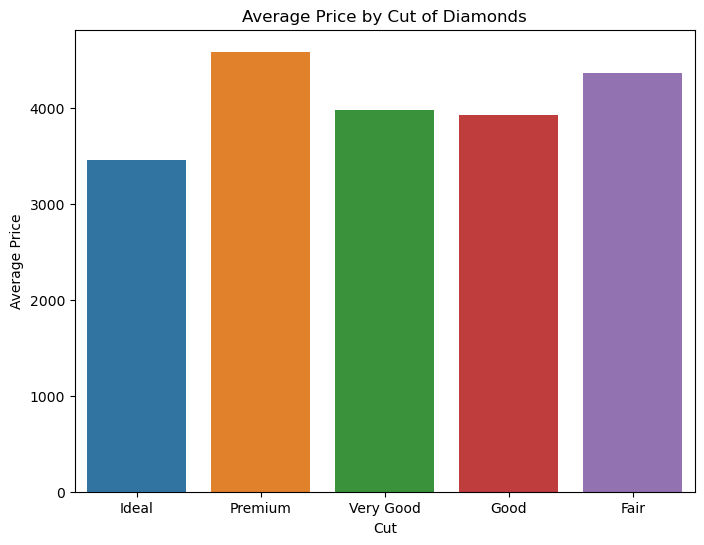


Diamond with the Highest Carat:
carat       5.01
cut         Fair
color          J
clarity       I1
depth       65.5
table       59.0
price      18018
x          10.74
y          10.54
z           6.98
Name: 27415, dtype: object

Diamonds with Cut 'Ideal' and Color 'D':
       carat    cut color clarity  depth  table  price     x     y     z
62      0.30  Ideal     D     SI1   62.5   57.0    552  4.29  4.32  2.69
63      0.30  Ideal     D     SI1   62.1   56.0    552  4.30  4.33  2.68
120     0.71  Ideal     D     SI2   62.3   56.0   2762  5.73  5.69  3.56
132     0.71  Ideal     D     SI1   61.9   59.0   2764  5.69  5.72  3.53
144     0.71  Ideal     D     SI2   61.6   55.0   2767  5.74  5.76  3.54
...      ...    ...   ...     ...    ...    ...    ...   ...   ...   ...
53854   0.51  Ideal     D    VVS2   61.7   56.0   2742  5.16  5.14  3.18
53855   0.51  Ideal     D    VVS2   61.3   57.0   2742  5.17  5.14  3.16
53884   0.81  Ideal     D     SI1   61.5   57.0   2748  6.00  6.03  3.7

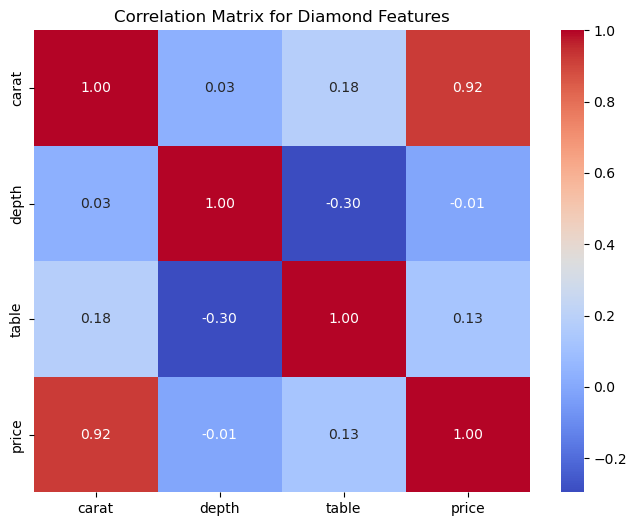


Diamonds Carat Summary Statistics by Clarity:
             mean  median   min   max
clarity                              
IF       0.505123    0.35  0.23  2.29
VVS1     0.503321    0.39  0.23  2.31
VVS2     0.596202    0.44  0.23  2.07
VS1      0.727158    0.57  0.23  2.59
VS2      0.763935    0.63  0.20  3.51
SI1      0.850482    0.76  0.21  2.57
SI2      1.077648    1.01  0.20  3.04
I1       1.283846    1.12  0.30  5.01

Average Price and Carat by Cut and Color:
                       price     carat
cut       color                       
Ideal     D      2629.094566  0.565766
          E      2597.550090  0.578401
          F      3374.939362  0.655829
          G      3720.706388  0.700715
          H      3889.334831  0.799525
          I      4451.970377  0.913029
          J      4918.186384  1.063594
Premium   D      3631.292576  0.721547
          E      3538.914420  0.717745
          F      4324.890176  0.827036
          G      4500.742134  0.841488
          H      5216.7

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Diamonds dataset into a pandas DataFrame
diamonds_df = sns.load_dataset('diamonds')

# Calculate the average price for each cut of diamonds
average_price_by_cut = diamonds_df.groupby('cut')['price'].mean()
print("Average Price for Each Cut of Diamonds:")
print(average_price_by_cut)

# Visualization: Bar plot for average price by cut
plt.figure(figsize=(8, 6))
sns.barplot(x=average_price_by_cut.index, y=average_price_by_cut.values)
plt.title('Average Price by Cut of Diamonds')
plt.xlabel('Cut')
plt.ylabel('Average Price')
plt.show()

# Find the diamond with the highest carat and display its details, including its cut, color, and clarity
highest_carat_diamond = diamonds_df.loc[diamonds_df['carat'].idxmax()]
print("\nDiamond with the Highest Carat:")
print(highest_carat_diamond)

# Create a new DataFrame containing only the diamonds with 'cut' as 'Ideal' and 'color' as 'D'
ideal_d_color_diamonds_df = diamonds_df[(diamonds_df['cut'] == 'Ideal') & (diamonds_df['color'] == 'D')]
print("\nDiamonds with Cut 'Ideal' and Color 'D':")
print(ideal_d_color_diamonds_df)

# Calculate the correlation matrix for 'carat', 'depth', 'table', and 'price' columns
correlation_matrix_diamonds = diamonds_df[['carat', 'depth', 'table', 'price']].corr()
print("\nCorrelation Matrix for Diamond Features:")
print(correlation_matrix_diamonds)

# Visualization: Heatmap for correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_diamonds, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Diamond Features')
plt.show()

# For each clarity grade of diamonds, find the mean, median, minimum, and maximum 'carat'
clarity_summary_stats = diamonds_df.groupby('clarity')['carat'].agg(['mean', 'median', 'min', 'max'])
print("\nDiamonds Carat Summary Statistics by Clarity:")
print(clarity_summary_stats)

# Replace any missing values in the 'depth' column with the mean value of that column
mean_depth = diamonds_df['depth'].mean()
diamonds_df['depth'].fillna(mean_depth, inplace=True)

# Create a new column in the DataFrame called 'volume', which is the product of 'x', 'y', and 'z' columns
diamonds_df['volume'] = diamonds_df['x'] * diamonds_df['y'] * diamonds_df['z']

# Group the DataFrame by 'cut' and 'color' and calculate the average price and carat for each group
grouped_avg_price_carat = diamonds_df.groupby(['cut', 'color'])[['price', 'carat']].mean()
print("\nAverage Price and Carat by Cut and Color:")
print(grouped_avg_price_carat)

# Calculate the total count of diamonds for each 'cut' and 'clarity' combination
diamonds_count_by_cut_clarity = diamonds_df.groupby(['cut', 'clarity']).size()
print("\nTotal Count of Diamonds by Cut and Clarity:")
print(diamonds_count_by_cut_clarity)


### Assignment 06:
1. Load the dataset Assignment06.csv.
2. Here, the Area column is having the data in a mixed format of `alphabetical` and `int` characters. You need to remove the last two zeros out of the data present in the column. As you can see in the first record the 'Area' column is A100100 after. Conversion it will look like this A1001
3. Filter the dataframe for records only for 2011 in a different dataframe.
4. Find the average value of 'geo_count' for the year 2022
5. Find the net average of 'ec_count' for year 2010,2011,2012
6. Plot KDE distribution of 'ec_count', for anzsic06 is F371.


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("Datasets\Assignment06.csv")
df.head()



In [ ]:
import re

df['Area'] = [re.sub(r'00$', '', df['Area'][i]) for i in range(0, len(df['Area']))]
df.head()



In [ ]:
df_2011 = df[df['year'] == 2011]

df_2011.head()


In [ ]:
avg_geo_count_2022 = df[df['year'] == 2022]['geo_count'].mean()
print(avg_geo_count_2022)

In [ ]:
avg_geo_count_10_11_12 = df[(df['year'] == 2010) | (df['year'] == 2011) | (df['year'] == 2012)]['ec_count'].mean()
print(avg_geo_count_10_11_12)

In [ ]:
df_F371 = df[df['anzsic06'] == 'F371']

import matplotlib.pyplot as plt
import seaborn as sns

sns.kdeplot(data = df_F371['ec_count'], shade =True)
plt.xlabel('ec_count')
plt.ylabel('Density')
plt.title('Kernel Density Estimation (KDE) Plot')

### Assignment 07:
1. Load the dataset Assignment07.csv
2. Find the most ordered item in the given dataframe.
3. Find the item, with the net highest number of quantity been sold.
4. Find the number of orders placed on '12-07-2011' and total quantity sold on this date.
5. Plot the number of orders placed with respect to each country.
6. Find the CustomerID of the person having the net highest number of quantity.


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("Datasets\Assignment07.csv")
df.head()

In [ ]:
most_ordered_item = df["Description"].value_counts().index[0]
print(f"Item: {most_ordered_item}, have been ordered {df['Description'].value_counts()[0]}")

In [ ]:
print(f"Item with the highest quantity sold is {df.groupby('Description')['Quantity'].sum().sort_values(ascending= False).index[0]} with number of quantity sold : {df.groupby('Description')['Quantity'].sum().max()}")

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
#Creating separate dataframe
filtered_df = df[df['InvoiceDate'].dt.date == pd.to_datetime('12-07-2011').date()]

#Coping the dataframe
print(f"On 12-07-2011, {len(filtered_df)} orders were placed and total {filtered_df['Quantity'].sum()} quantity of items were sold.")

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

order_by_country = df.groupby('Country').sum()

order_by_country.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Country')
plt.ylabel('Net Orders')
plt.title('Net Orders Placed in Different Countries')

# Display the plot
plt.show()

In [ ]:
df_customer_id = df.groupby('CustomerID')['Quantity'].sum()

df_customer_id.idxmax()